In [1]:
import pandas as pd
import numpy as np

In [168]:
host_df = pd.read_csv("./tables/ELVES_host.csv", sep=" ")
host_df

,Name,Dist(Mpc),Nconfirmed(unconfirmed),rcover(kpc),Detection,Confirmation,Photometry
0,MW,0.00,7(0),300,–,–,M12
1,M31,0.78,13(0),300,–,–,M12
2,NGC1023,10.40,12(3),300,CFHT/MegaCam,CFHT/MegaCam,CFHT/MegaCam
3,NGC2903,9.00,6(1),300,"CFHT/MegaCam,DECaLS","CFHT/MegaCam,Gemini","CFHT/MegaCam,DECaLS"
4,NGC4258,7.20,5(0),150,CFHT/MegaCam,CFHT/MegaCam,CFHT/MegaCam
5,NGC4565,11.90,3(5),150,CFHT/MegaCam,CFHT/MegaCam,CFHT/MegaCam
6,NGC4631,7.40,10(0),200,DECaLS,"CFHT/MegaCam,Gemini","CFHT/MegaCam,DECaLS"
7,M51,8.58,0(2),150,CFHT/MegaCam,CFHT/MegaCam,CFHT/MegaCam
8,M104,9.55,11(2),150,CFHT/MegaCam,CFHT/MegaCam,CFHT/MegaCam
9,NGC891,9.12,3(0),200,CFHT/MegaCam,CFHT/MegaCam,CFHT/MegaCam


In [170]:
"de" in ["noidece", "ddad"]

False

In [171]:
# Create a list of host (valid_host) that were confirmed by detections in the valid_detections list
valid_detection = ("DECaLS", "DECam")
valid_hosts = []
for host_name, detection in zip(host_df["Name"], host_df["Detection"]):
    for val_dec in valid_detection:
        if val_dec in detection:
            valid_hosts.append(host_name)
            break 
    
# Load the file with sat_galaxys into a pandas dataframe. 
# Only put in the dataframe galaxys that are satellites of valid hosts.
sat_df = pd.DataFrame({})
with open("./tables/LV_sats.txt", "r") as sat_file:
    columns = sat_file.readline().split()
    
    rows_list= []
    for line in sat_file.readlines():
        row_i = line.split()
        if row_i[1] in valid_hosts: # Don't include galaxys tha aren't satellites of valid hosts 
            rows_list.append(row_i)

sat_df = pd.DataFrame(rows_list, columns=columns)
print(sat_df.head(5))

          Name     Host       RA     DEC     M_g     M_V M_V_err logM*  \
0  dw0932p2127  NGC2903  143.203  21.466  -14.03  -14.37    0.08  7.87   
1  dw0930p1959  NGC2903  142.554  19.991  -13.12  -13.34    0.09  7.13   
2  dw0933p2030  NGC2903  143.307  20.515  -12.39  -12.65    0.10  6.99   
3  dw0936p2135  NGC2903  144.089  21.599  -11.93  -12.19    0.10  6.78   
4  dw0930p2143  NGC2903  142.667  21.724  -10.81  -10.95    0.09  5.98   

  logM*_err  mu_0V mu_0V_err    r_e r_e_err   ell ell_err   ETG? Filts  \
0      0.13  22.38      0.13  728.9    30.3  0.14    0.02   True    gr   
1      0.13  23.61      0.11  556.5    32.0  0.07    0.02  False    gr   
2      0.13  22.53      0.12  443.9    28.3  0.30    0.03   True    gr   
3      0.13  22.74      0.13  341.4    23.6  0.20    0.03  False    gr   
4      0.12  23.30      0.06  270.5    21.5  0.54    0.02  False    gr   

      tel bad_photo?  
0    CFHT       None  
1  DECALS       None  
2  DECALS       None  
3  DECALS       No

In [173]:
# Find all different satellites host
sat_hosts = []
for host_i in sat_df["Host"]:
    if host_i not in sat_hosts:
        sat_hosts.append(host_i)
print(f"Sat_host: {sat_hosts}")

# check if any satellite host is not in the host dataframe
host_df_names = list(host_df["Name"])
for sat_host_i in sat_hosts:
    if sat_host_i not in host_df_names:
        print(f"{sat_host_i} is not in the host_df")

Sat_host: ['NGC2903', 'NGC4631', 'NGC6744', 'M101', 'M94', 'NGC253', 'M64', 'NGC5055', 'NGC4517', 'NGC3627', 'NGC3379', 'NGC628', 'NGC3115']


In [174]:
# Calculate satellites distance based in their host distance. 
# TODO: This can be done using pandas index method
host_df["Dist(Mpc)"] = host_df["Dist(Mpc)"].astype(float)

sat_dist = []
for host in sat_df["Host"]:
    idx = host_df_names.index(host)
    sat_dist.append(host_df.loc[idx, "Dist(Mpc)"])


In [175]:
# Calculate sattelite angular radius in arcsec
sat_df["r_e"] = sat_df["r_e"].astype(float)

sat_angular_radius = []
for r_eff, dist in zip(sat_df["r_e"], sat_dist):
    ang_r = (r_eff/(dist * 1e6)) * (3600*180)/(np.pi)
    sat_angular_radius.append(ang_r)

sat_angular_radius[:5]

[16.705157474834284,
 12.754040519612127,
 10.173438610342897,
 7.824311650306522,
 6.199403343315507]

In [176]:
# Append distance and angular radius to sat_df
sat_df.loc[:, "Dist(Mpc)"] = sat_dist
sat_df.loc[:, "r_ang(arcsec)"] = sat_angular_radius

sat_df.head(5)

,Name,Host,RA,DEC,M_g,M_V,M_V_err,logM*,logM*_err,mu_0V,...,r_e,r_e_err,ell,ell_err,ETG?,Filts,tel,bad_photo?,Dist(Mpc),r_ang(arcsec)
0,dw0932p2127,NGC2903,143.203,21.466,-14.03,-14.37,0.08,7.87,0.13,22.38,...,728.9,30.3,0.14,0.02,True,gr,CFHT,None,9.0,16.705157
1,dw0930p1959,NGC2903,142.554,19.991,-13.12,-13.34,0.09,7.13,0.13,23.61,...,556.5,32.0,0.07,0.02,False,gr,DECALS,None,9.0,12.754041
2,dw0933p2030,NGC2903,143.307,20.515,-12.39,-12.65,0.10,6.99,0.13,22.53,...,443.9,28.3,0.30,0.03,True,gr,DECALS,None,9.0,10.173439
3,dw0936p2135,NGC2903,144.089,21.599,-11.93,-12.19,0.10,6.78,0.13,22.74,...,341.4,23.6,0.20,0.03,False,gr,DECALS,None,9.0,7.824312
4,dw0930p2143,NGC2903,142.667,21.724,-10.81,-10.95,0.09,5.98,0.12,23.30,...,270.5,21.5,0.54,0.02,False,gr,CFHT,None,9.0,6.199403


In [177]:
# Create a csv with galaxys coords and their respective pixelscale
sat_to_download = []
for ra, dc, r_ang in zip(sat_df["RA"], sat_df["DEC"], sat_df["r_ang(arcsec)"]):
    ps = 8 * r_ang / (256) # All the images downloaded have 256 pixel x 256 pixel 
    sat_to_download.append((ra, dc, ps))

sat_to_download = pd.DataFrame(sat_to_download, columns=("ra", "dec", "ps"))
sat_to_download.to_csv("./sat_to_download.csv")

sat_to_download.head(5)

,ra,dec,ps
0,143.203,21.466,0.522036
1,142.554,19.991,0.398564
2,143.307,20.515,0.317920
3,144.089,21.599,0.244510
4,142.667,21.724,0.193731


In [184]:
import matplotlib.pyplot as plt

0.5232776107518232 0.1414507883168419 2.4464196010172437


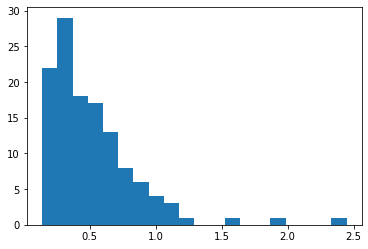

In [191]:
a = np.array(sat_to_download["ps"])
print(a.mean(), a.min(), a.max())
plt.hist(a, bins=20)
plt.show()